In [1]:
# notebook to open up a frb.sky (fitts image file), and make a postage stamp at a given ra,dec and make a lc

In [3]:
# imports 

import numpy as np
import matplotlib.pyplot as plt
from astropy.nddata import Cutout2D # postage stamp
from astropy import units as u
from astropy.io import fits
from astropy.wcs import WCS 

from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [10]:
from astropy.io import fits
>>> from astropy.wcs import WCS
>>> from astropy.utils.data import get_pkg_data_filename
>>> fn = get_pkg_data_filename('data/j94f05bgq_flt.fits', package='astropy.wcs.tests')
>>> f = fits.open(fn)

f = fits.open(fn)
w_test = WCS(f[1].header)
sky_test = w_test.pixel_to_world(30, 40)
print(sky_test) 

<SkyCoord (ICRS): (ra, dec) in deg
    (5.52844243, -72.05207809)>


In [8]:
ls

03110142001_lc.pdf     grb.dpi      lc_4.ps
03110142001_lc.v2.pdf  grb.lc       sw03110142001bdecb.hk.gz
cat.fits               grb.mask     sw03110142001bevshpo_uf.evt.gz
frb.sky                grb_sky      sw03110142001bmt00010003.lc.gz
grb_4.dpi              grb.sky.pdf  sw03110142001sat.fits.gz


In [12]:
with fits.open('frb.sky') as hdul:
        hdul.info()
        header_dict = hdul[0].header
        data = hdul[1].data
        w = WCS(hdul[1].header)
    
        #ra = header_dict['RA_PNT']
        #dec = header_dict['DEC_PNT']
        
# should I add the associated chime_id and chime_trigger to the sky image files in the header?


Filename: frb.sky
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  BAT_IMAGE_1    1 PrimaryHDU     249   (1760, 954)   float32   
  1  EBOUNDS       1 BinTableHDU    148   1R x 3C   [I, E, E]   
  2  STDGTI        1 BinTableHDU     80   1R x 2C   [D, D]   


In [14]:
image_data = fits.getdata('grb_sky', ext=0)
#w = WCS(hdul[1].header)
sky = w.pixel_to_world(30, 40)
print(sky)

[<Quantity 31.>, <Quantity 41.>]


In [46]:
#x, y = w.world_to_pixel(RAcent,DECcent )

UnitConversionError: 'deg' (angle) and '' (dimensionless) are not convertible

In [22]:
print(image_data.shape)

(954, 1760)


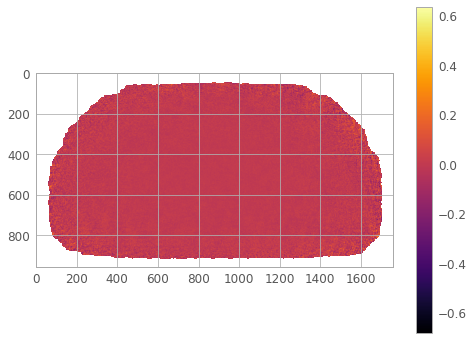

In [21]:
plt.figure()
plt.imshow(image_data, cmap='inferno')
plt.colorbar()
plt.savefig('grb.sky.pdf')

In [43]:
RAcent = 15.9485 * degree  # this is from the source finder
DECcent= -73.8547 * degree

In [41]:
degree = u.degree

In [42]:
degree

Unit("deg")

In [45]:
DECcent

<Quantity -73.8547 deg>